# Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- Data.csv: It contains information of ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- item.csv: File contains information related to the movies and its genre.

- Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- user.csv: It contains information of the users who have rated the movies. Columns: user id, age, gender, occupation, zip code

### Objective:

`To implement the techniques learnt as a part of the course.`

### Learning Outcomes:
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


#### Domain 
`Internet and Entertainment`

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [1]:
import warnings
warnings.filterwarnings("ignore")
from PIL import Image 

#### 1. Import the necessary packages - 2.5 marks

In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt       #to plot data
import seaborn as sns                 #adds additional options for visualizations
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
df_ratings = pd.read_csv('Data(1).csv') #User ratings
df_ratings.head()                    #show first 5 rows of user ratings

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
df_movies = pd.read_csv('item.csv') #Movie data
df_movies.head() #show first 5 rows of movie data

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [5]:
df_users = pd.read_csv('user.csv') #Data on users
df_users.head()                    #show first 5 rows of user data

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [6]:
df_ratings.shape

(100000, 4)

In [7]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [8]:
df_ratings.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [9]:
df_ratings.isnull().sum() #Find missing values

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

### The code that follows is related to the dataset on movie data

In [10]:
df_movies.shape

(1681, 22)

In [11]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [12]:
df_movies.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df_movies.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

### The code that follows is related to the dataset on user data

In [14]:
df_users.shape

(943, 5)

In [15]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [16]:
df_users.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [17]:
df_users.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

#### 4. Find the number of movies per genre using the item data - 2.5 marks

In [18]:
# use sum of the default axis
df_movies.sum(axis = 0) #prints the sum of entries for each genre 

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

#### 5. Find the movies that have more than one genre - 5 marks

In [19]:
column_list = list(df_movies)
column_list.remove("movie id") #remove column "movie id"

In [20]:
print(column_list)

['movie title', 'release date', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [21]:
#hint: use sum on the axis = 1
df_movies["number of genres"] = df_movies[column_list].sum(axis=1)

In [22]:
df_movies

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,number of genres
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,3
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
df_movies["number of genres"]>=2

0        True
1        True
2       False
3        True
4        True
        ...  
1676    False
1677     True
1678     True
1679    False
1680    False
Name: number of genres, Length: 1681, dtype: bool

In [24]:
df_movies[["movie id", "movie title", "number of genres"]]

,movie id,movie title,number of genres
0,1,Toy Story,3
1,2,GoldenEye,3
2,3,Four Rooms,1
3,4,Get Shorty,3
4,5,Copycat,3
...,...,...,...
1676,1678,Mat' i syn,1
1677,1679,B. Monkey,2
1678,1680,Sliding Doors,2
1679,1681,You So Crazy,1


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [25]:
#use drop to drop the unknown column
df_movies.drop("unknown", axis=1)

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,number of genres
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
4,5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [26]:
# HINT: use distplot for age and countplot for gender,ratings,occupation, release year.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below.

a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

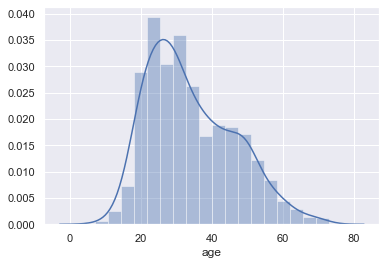

In [30]:
sns.distplot(df_users["age"]); 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

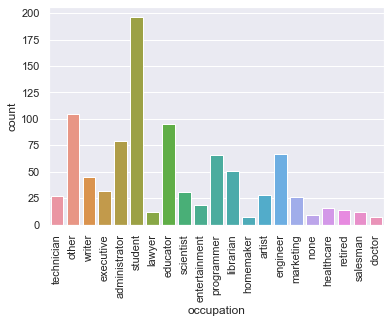

In [31]:
sns.countplot(df_users["occupation"]); #visualize occupation data
plt.xticks(rotation=90) #rotate text 

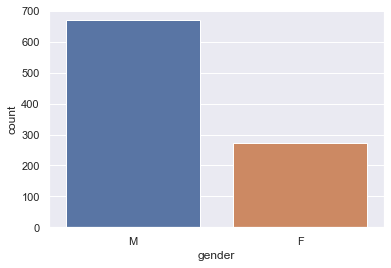

In [32]:
sns.countplot(df_users["gender"]); #plot data on gender

<function matplotlib.pyplot.show(*args, **kw)>

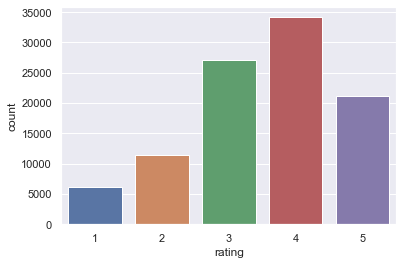

In [33]:
sns.countplot(df_ratings["rating"]); #plot data on  movie ratings
plt.show

In [34]:
#your answers here
import datetime
df_movies["year"]=pd.DatetimeIndex(df_movies["release date"]).year
df_movies.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,number of genres,year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,3,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,3,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,3,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,3,1995


<function matplotlib.pyplot.show(*args, **kw)>

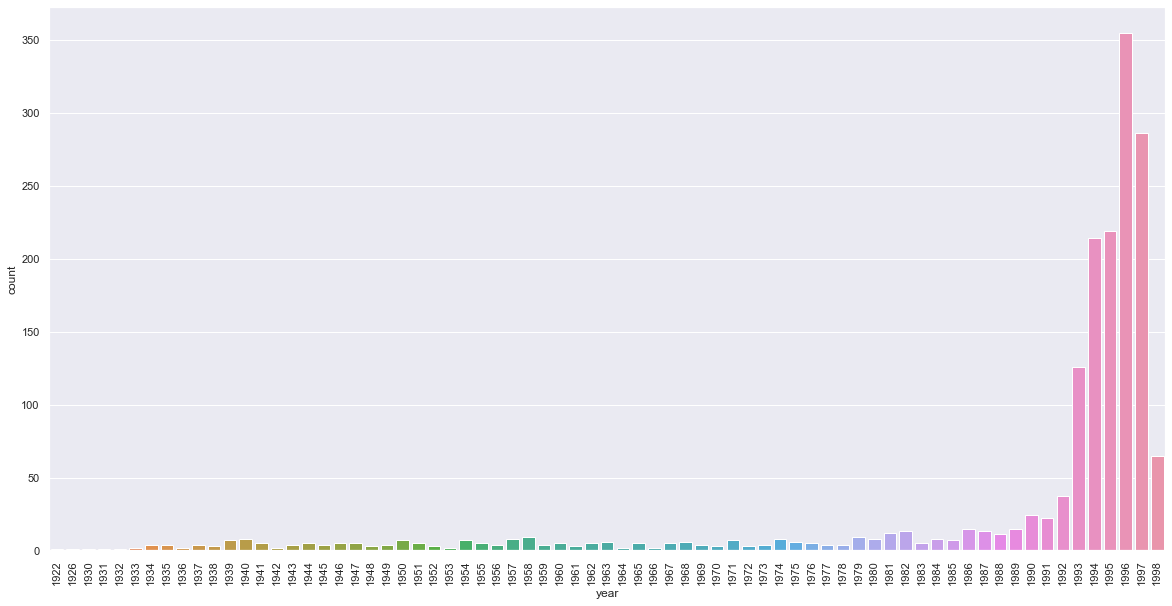

In [35]:
plt.figure(figsize=(20,10)) #set larger figure size to accommodate the all years in dataset
sns.countplot(df_movies["year"]);
plt.xticks(rotation=90) #rotate text to avoid crowding
plt.show

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use multiple bivariate plots or can use the heatmap to visualise all the changes over the years in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [36]:
#Your answer here
#drop columns that are not needed
movies = df_movies.drop(["movie id","movie title","release date", "number of genres"], axis = 1)
#set the release year as the index
df_movies.set_index("year")

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,number of genres
year,,,,,,,,,,,,,,,,,,,,,
1995,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,3
1995,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
1995,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1995,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
1995,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1998,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2
1998,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2


In [37]:
release_year = movies.groupby("year")
release_year.sum() #sum of all genres by year

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


In [38]:
movies.corr() #get correlation data

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
unknown,1.000000,-0.010221,-0.007210,-0.003906,-0.006825,-0.015988,-0.006424,-0.004272,-0.021246,-0.002810,-0.002936,-0.005871,-0.004529,-0.004734,-0.010126,-0.006168,-0.010221,-0.005123,-0.003117,-0.031480
Action,-0.010221,1.000000,0.336827,-0.034984,-0.059296,-0.158033,0.045581,-0.073355,-0.209813,0.010502,-0.050421,-0.005409,-0.040569,-0.000966,-0.056014,0.273361,0.217878,0.086297,0.052691,0.090208
Adventure,-0.007210,0.336827,1.000000,0.036842,0.271694,-0.107699,-0.015589,-0.051739,-0.195460,0.158573,-0.035564,-0.042233,0.006131,-0.033931,-0.036084,0.238461,0.005174,0.035893,-0.002931,-0.028898
Animation,-0.003906,-0.034984,0.036842,1.000000,0.440021,-0.021762,-0.042152,-0.028028,-0.139404,0.048639,-0.019265,-0.021761,0.331345,-0.031063,-0.044906,0.023681,-0.034984,-0.014666,-0.020453,-0.074684
Childrens,-0.006825,-0.059296,0.271694,0.440021,1.000000,0.021753,-0.073662,-0.048980,-0.155644,0.290598,-0.033667,-0.067311,0.216396,-0.017499,-0.090194,-0.003186,-0.110766,-0.047345,-0.017502,-0.065992
Comedy,-0.015988,-0.158033,-0.107699,-0.021762,0.021753,1.000000,-0.088242,-0.107098,-0.337476,0.004463,-0.078865,-0.077808,0.037433,-0.050831,0.083556,-0.094696,-0.223570,-0.053740,-0.011470,0.037977
Crime,-0.006424,0.045581,-0.015589,-0.042152,-0.073662,-0.088242,1.000000,-0.046105,0.004826,-0.009067,0.171949,-0.031497,-0.048883,0.078086,-0.068344,-0.046245,0.126921,-0.055297,-0.033643,0.015923
Documentary,-0.004272,-0.073355,-0.051739,-0.028028,-0.048980,-0.107098,-0.046105,1.000000,-0.131263,-0.020163,-0.021072,-0.042130,-0.032503,-0.033975,-0.072666,-0.044268,-0.073355,-0.019358,-0.022370,0.066278
Drama,-0.021246,-0.209813,-0.195460,-0.139404,-0.155644,-0.337476,0.004826,-0.131263,1.000000,-0.058007,-0.084555,-0.183138,-0.094727,-0.072638,-0.025543,-0.174686,-0.159259,0.044064,-0.063490,0.063061
Fantasy,-0.002810,0.010502,0.158573,0.048639,0.290598,0.004463,-0.009067,-0.020163,-0.058007,1.000000,-0.013859,-0.027709,-0.021377,-0.022346,-0.018224,0.103043,-0.033559,-0.024183,-0.014713,0.018920


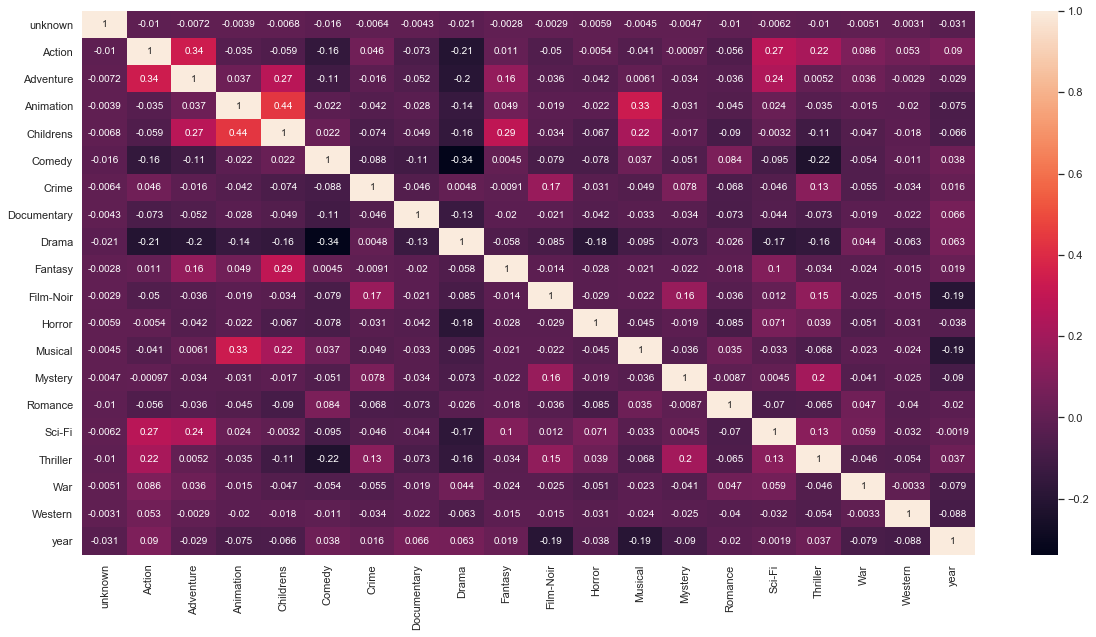

In [39]:
plt.figure(figsize=(20,10)) #to accommodate all data
sns.heatmap(movies.corr(), annot=True)  # plot the correlation coefficients as a heatmap

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 

1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the ids and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [40]:
#your answer here
#merge dataframes containing movie and rating info
movie_ratings=pd.merge(df_movies, df_ratings, on="movie id")
movie_ratings #printout new dataframe

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Romance,Sci-Fi,Thriller,War,Western,number of genres,year,user id,rating,timestamp
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,3,1995,308,4,887736532
1,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,3,1995,287,5,875334088
2,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,3,1995,148,4,877019411
3,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,3,1995,280,4,891700426
4,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,3,1995,66,3,883601324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1998,863,1,889289570
99987,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,1,0,1,0,0,2,1998,863,3,889289491
99988,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,1,0,0,0,0,2,1998,863,2,889289570
99989,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1994,896,3,887160722


In [51]:
#merge movie ratings with user data
user_movie_ratings=pd.merge(df_users, movie_ratings, on="user id")
user_movie_ratings

,user id,age,gender,occupation,zip code,movie id,movie title,release date,unknown,Action,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,number of genres,year,rating,timestamp
0,1,24,M,technician,85711,1,Toy Story,01-Jan-1995,0,0,...,0,0,0,0,0,0,3,1995,5,874965758
1,1,24,M,technician,85711,2,GoldenEye,01-Jan-1995,0,1,...,0,0,0,1,0,0,3,1995,3,876893171
2,1,24,M,technician,85711,3,Four Rooms,01-Jan-1995,0,0,...,0,0,0,1,0,0,1,1995,4,878542960
3,1,24,M,technician,85711,4,Get Shorty,01-Jan-1995,0,1,...,0,0,0,0,0,0,3,1995,3,876893119
4,1,24,M,technician,85711,5,Copycat,01-Jan-1995,0,0,...,0,0,0,1,0,0,3,1995,3,889751712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,943,22,M,student,77841,1067,Bottle Rocket,21-Feb-1996,0,0,...,0,0,0,0,0,0,1,1996,2,875501756
99987,943,22,M,student,77841,1074,Reality Bites,01-Jan-1994,0,0,...,0,0,0,0,0,0,2,1994,4,888640250
99988,943,22,M,student,77841,1188,Young Guns II,01-Jan-1990,0,1,...,0,0,0,0,0,1,3,1990,3,888640250
99989,943,22,M,student,77841,1228,Under Siege 2: Dark Territory,01-Jan-1995,0,1,...,0,0,0,0,0,0,1,1995,3,888640275


In [55]:
movies=user_movie_ratings.groupby(by=[user_movie_ratings["movie title"]]).rating.count() #counts the ratings
movies[movies] #print titles with total number of ratings

movie title
39 Steps, The                     59
2 Days in the Valley              93
Babe                             219
Barbarella                        28
Alien                            291
                                ... 
Associate, The                    41
Aliens                           284
Alien                            291
20,000 Leagues Under the Sea      72
1-900                              5
Name: rating, Length: 1658, dtype: int64

In [56]:
#return a boolean of movies with > 100 ratings
movies=user_movie_ratings.groupby(by=[user_movie_ratings["movie title"]]).rating.count()>100 
movies[movies] #print titles with total number of ratings

movie title
101 Dalmatians                            True
12 Angry Men                              True
2001: A Space Odyssey                     True
Absolute Power                            True
Abyss, The                                True
                                          ... 
Willy Wonka and the Chocolate Factory     True
Wizard of Oz, The                         True
Wrong Trousers, The                       True
Young Frankenstein                        True
Young Guns                                True
Name: rating, Length: 334, dtype: bool

In [54]:
#get average rating by movie title
#reset indext to return values to a dataframe
avg_rating=user_movie_ratings.groupby("movie title")["rating"].mean().reset_index() 
#sort top rated movies in descending order
sort_ratings=avg_rating.sort_values(by="rating", axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
sort_ratings.head(25) #print top 25 movies

,movie title,rating
632,"Great Day in Harlem, A",5.000000
1171,Prefontaine,5.000000
1355,Someone Else's America,5.000000
943,Marlene Dietrich: Shadow and Light (,5.000000
461,Entertaining Angels: The Dorothy Day Story,5.000000
1383,Star Kid,5.000000
1467,They Made Me a Criminal,5.000000
30,Aiqing wansui,5.000000
1271,"Saint of Fort Washington, The",5.000000
1275,Santa with Muscles,5.000000


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [60]:
#group ratings by gender
gender_ratings = user_movie_ratings[["gender", "rating"]].groupby("gender").count()
gender_ratings

,rating
gender,
F,25738
M,74253


In [64]:
#count number of ratings for specified genres by gender
genre_ratings = user_movie_ratings[["gender", "Drama", "Romance", "Sci-Fi"]].groupby("gender").sum()
genre_ratings

,Drama,Romance,Sci-Fi
gender,,,
F,11008,5858,2629
M,28887,13603,10101


In [73]:
genre_ratings["drama percent"] = (genre_ratings["Drama"]/genre_ratings["Drama"].sum())*100
genre_ratings["romance percent"] = (genre_ratings["Romance"]/genre_ratings["Romance"].sum())*100
genre_ratings["sci_fi percent"] = (genre_ratings["Sci-Fi"]/genre_ratings["Sci-Fi"].sum())*100
genre_ratings

,Drama,Romance,Sci-Fi,percent,drama percent,romance percent,sci_fi percent
gender,,,,,,,
F,11008,5858,2629,27.59243,27.59243,30.101228,20.652003
M,28887,13603,10101,72.40757,72.40757,69.898772,79.347997


#### Conclusion:



Based on the data above, the statements, "Men watch more dramas than women" and "Men watch more romance movies than women" are true, while the statement, "Women watch more Sci-Fi than men" is false. However, it should be noted that the number of male raters is greater than the number of female raters which may account for the differences. Therefore, it is inconclusive as the data is not equal.